# Missing value imputation: MeanMedianImputer

The MeanMedianImputer() replaces missing data by the mean or median value of the
variable. It works only with numerical variables.

We can pass a list of variables to be imputed. Alternatively, the
MeanMedianImputer() will automatically select all variables of type numeric in the
training set.

**For this demonstration, we use the Ames House Prices dataset produced by Professor Dean De Cock:**

Dean De Cock (2011) Ames, Iowa: Alternative to the Boston Housing
Data as an End of Semester Regression Project, Journal of Statistics Education, Vol.19, No. 3

http://jse.amstat.org/v19n3/decock.pdf

https://www.tandfonline.com/doi/abs/10.1080/10691898.2011.11889627

The version of the dataset used in this notebook can be obtained from [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from  feature_engine.imputation import MeanMedianImputer

In [2]:
data = pd.read_csv('houseprice.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(['Id', 'SalePrice'], axis=1), data['SalePrice'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((1022, 79), (438, 79))

In [4]:
# numerical variables with missing data
X_train[['LotFrontage', 'MasVnrArea']].isnull().mean()

LotFrontage    0.184932
MasVnrArea     0.004892
dtype: float64

### Imputation with the median

The MeanMedianImputer replaces NA in numerical variables by either the mean or the median value of the variable.

In [5]:
median_imputer = MeanMedianImputer(
    imputation_method='median',
    variables=['LotFrontage', 'MasVnrArea'])

# find median values
median_imputer.fit(X_train)

MeanMedianImputer(variables=['LotFrontage', 'MasVnrArea'])

In [6]:
# dictionary with the imputation values for each variable

median_imputer.imputer_dict_

{'LotFrontage': 69.0, 'MasVnrArea': 0.0}

In [7]:
# let's corroborate that the dictionary above contains the mean values of the variables

X_train[['LotFrontage', 'MasVnrArea']].median()

LotFrontage    69.0
MasVnrArea      0.0
dtype: float64

In [8]:
# transform the data
train_t= median_imputer.transform(X_train)
test_t= median_imputer.transform(X_test)

# and check we no longer have NA
train_t[['LotFrontage', 'MasVnrArea']].isnull().sum()

LotFrontage    0
MasVnrArea     0
dtype: int64

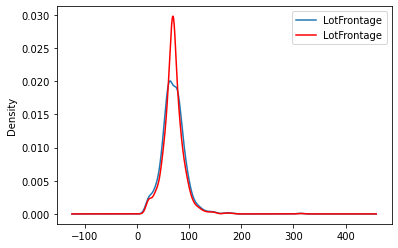

In [9]:
# we can see that the distribution has changed slightly with
# more values accumulating towards the median after the imputation

fig = plt.figure()
ax = fig.add_subplot(111)
X_train['LotFrontage'].plot(kind='kde', ax=ax)
train_t['LotFrontage'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

### Automatically select all numerical variables

If no variable list is indicated, the imputer will select all numerical variables in the dataset

In [10]:
mean_imputer = MeanMedianImputer(imputation_method='mean')

# find the numerical variables and their mean values
mean_imputer.fit(X_train)

MeanMedianImputer(imputation_method='mean')

In [11]:
# numerical variables encountered
mean_imputer.variables_

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [12]:
# here we find the imputation mean for each variable
mean_imputer.imputer_dict_

{'MSSubClass': 56.614481409001954,
 'LotFrontage': 69.66866746698679,
 'LotArea': 10567.96673189824,
 'OverallQual': 6.079256360078278,
 'OverallCond': 5.562622309197652,
 'YearBuilt': 1970.940313111546,
 'YearRemodAdd': 1984.6986301369864,
 'MasVnrArea': 103.55358898721731,
 'BsmtFinSF1': 442.2240704500978,
 'BsmtFinSF2': 47.12720156555773,
 'BsmtUnfSF': 565.9921722113503,
 'TotalBsmtSF': 1055.3434442270059,
 '1stFlrSF': 1161.7221135029354,
 '2ndFlrSF': 354.7250489236791,
 'LowQualFinSF': 5.690802348336595,
 'GrLivArea': 1522.1379647749511,
 'BsmtFullBath': 0.4187866927592955,
 'BsmtHalfBath': 0.05675146771037182,
 'FullBath': 1.576320939334638,
 'HalfBath': 0.38258317025440314,
 'BedroomAbvGr': 2.8943248532289627,
 'KitchenAbvGr': 1.0450097847358122,
 'TotRmsAbvGrd': 6.548923679060666,
 'Fireplaces': 0.6125244618395304,
 'GarageYrBlt': 1978.0123966942149,
 'GarageCars': 1.764187866927593,
 'GarageArea': 469.3982387475538,
 'WoodDeckSF': 94.8522504892368,
 'OpenPorchSF': 47.3786692759

In [13]:
# transform the data

train_t= mean_imputer.transform(X_train)
test_t= mean_imputer.transform(X_test)

# the numerical variables do not have NA after 
# the imputation
test_t[mean_imputer.variables_].isnull().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64